In [1]:
import sys
import os
import glob

package_path = "../../funROI"
sys.path.append(os.path.abspath(package_path))
import funROI

funROI.set_bids_data_folder("../data/bids")
funROI.set_bids_deriv_folder("../data/bids/derivatives/funROI")
funROI.set_bids_preprocessed_folder("../data/bids/derivatives/fmriprep")

# Turn off all warnings
import warnings
warnings.filterwarnings("ignore")

use_spm_smooth = True

# SPM First-Level Migration

The replication is based on SPM first-level (contrast) results to mitigate any 

possible discrepancies originating from the first-level modeling choices. The 

code below migrates the SPM first-level results to a BIDS-compliant file 

structure, which will be used in the subsequent analyses.

In [2]:
# from funROI.first_level.spm import migrate_first_level_from_spm

# spm_data_dir = '../data/spm_first_level_results'
# for task, task_suffix in [
#     ('SWNloc', 'SWNlocIPS168_3runs'),
#     ('EventsOrig', 'EventsOrig_instrsep_2runs')]:
#     spm_folders = glob.glob(os.path.join(spm_data_dir, f'*_{task_suffix}'))
#     for spm_folder in spm_folders:
#         subject_id = os.path.basename(spm_folder).split('_')[0]
#         migrate_first_level_from_spm(spm_folder, subject_id, task)

# Parcels Generation

In [3]:
from funROI.analysis import ParcelsGenerator
from nilearn.plotting import plot_glass_brain

## Parcels generation with S-N language localizer

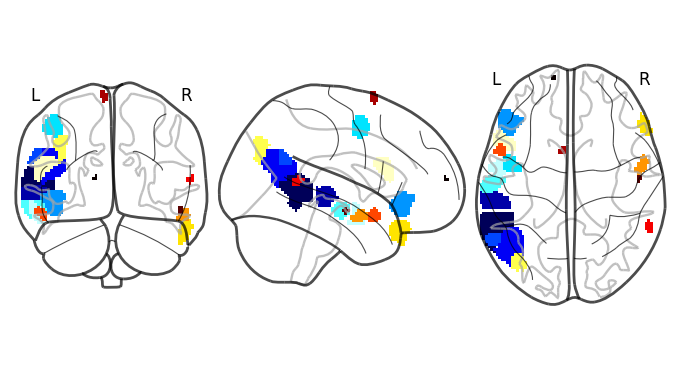

In [4]:
parcels_generator = ParcelsGenerator(
    smoothing_kernel_size=6, overlap_thr_vox=0.1, use_spm_smooth=use_spm_smooth
)
parcels_generator.add_subjects(
    subjects=[
        "040",
        "057",
        "059",
        "056",
        "067",
        "068",
        "019",
        "070",
        "087",
        "078",
        "089",
        "076",
    ],
    task="SWNloc",
    localizer="S-N",
    threshold_type="none",
    threshold_value=0.001,
)
parcels = parcels_generator.generate()
plot_glass_brain(parcels, plot_abs=False)
parcels_generator.save(parcels_name="languageSminusN")

## Parcels generation with Events localizers

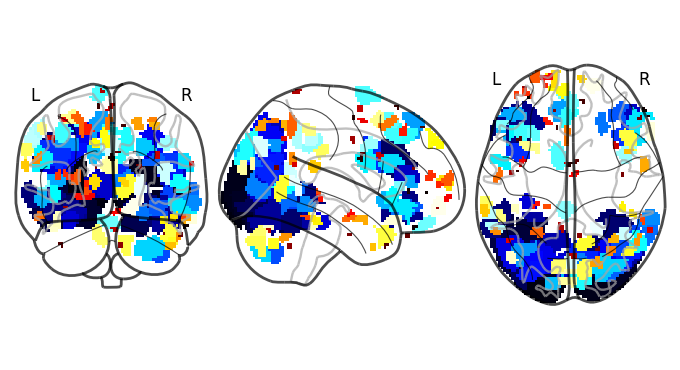

In [5]:
parcels_generator_photo = ParcelsGenerator(
    smoothing_kernel_size=6,
    overlap_thr_vox=0.05,
    use_spm_smooth=use_spm_smooth,
)
parcels_generator_photo.add_subjects(
    subjects=[
        "040",
        "057",
        "059",
        "056",
        "067",
        "068",
        "019",
        "070",
        "087",
        "078",
        "089",
        "076",
    ],
    task="EventsOrig",
    localizer="Sem_photominusPerc_photo",
    threshold_type="none",
    threshold_value=0.05,
)
parcels = parcels_generator_photo.generate()
plot_glass_brain(parcels, plot_abs=False)
parcels_generator_photo.save(parcels_name="eventsPhoto")

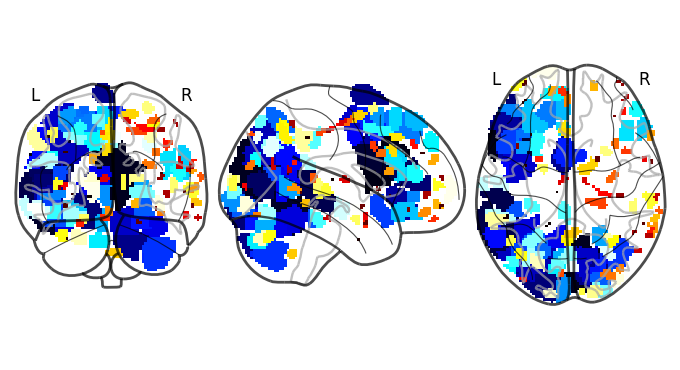

In [6]:
parcels_generator_sent = ParcelsGenerator(
    smoothing_kernel_size=6,
    overlap_thr_vox=0.05,
    use_spm_smooth=use_spm_smooth,
)
parcels_generator_sent.add_subjects(
    subjects=[
        "040",
        "057",
        "059",
        "056",
        "067",
        "068",
        "019",
        "070",
        "087",
        "078",
        "089",
        "076",
    ],
    task="EventsOrig",
    localizer="Sem_sentminusPerc_sent",
    threshold_type="none",
    threshold_value=0.05,
)
parcels = parcels_generator_sent.generate()
plot_glass_brain(parcels, plot_abs=False)
parcels_generator_sent.save(parcels_name="eventsSent")

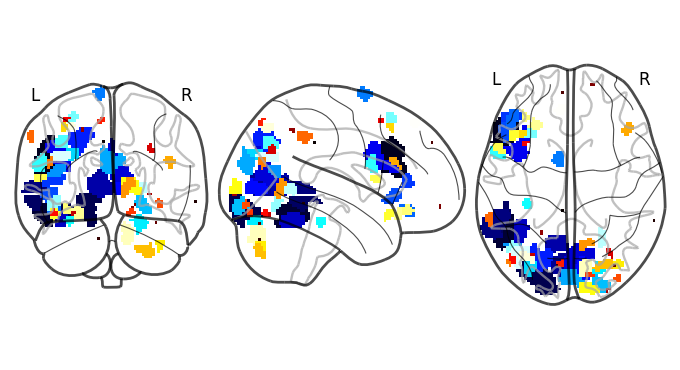

In [7]:
from funROI.localizer import Localizer

parcels_generator_both = ParcelsGenerator(
    smoothing_kernel_size=6,
    overlap_thr_vox=0.05,
    use_spm_smooth=use_spm_smooth,
)
parcels_generator_both.add_subjects(
    subjects=[
        "040",
        "057",
        "059",
        "056",
        "067",
        "068",
        "019",
        "070",
        "087",
        "078",
        "089",
        "076",
    ],
    task="EventsOrig",
    localizer=Localizer(
        localizer="SemMinusPercBoth",
        contrasts=["Sem_photominusPerc_photo", "Sem_sentminusPerc_sent"],
        conjunctionType="and",
    ),
    threshold_type="none",
    threshold_value=0.05,
)
parcels = parcels_generator_both.generate()
plot_glass_brain(parcels, plot_abs=False)
parcels_generator_both.save(parcels_name="eventsBoth")

The localizer is also registered for subjects selected after the codes are run.

# Comparison of funROI vs. spm_ss results 

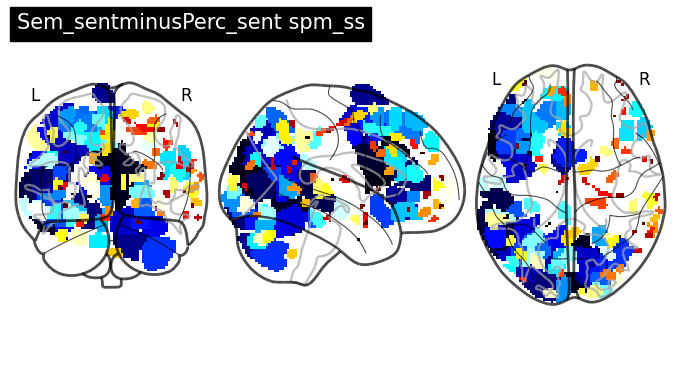

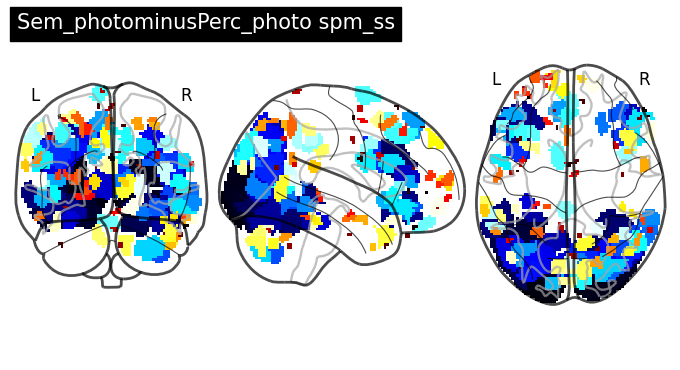

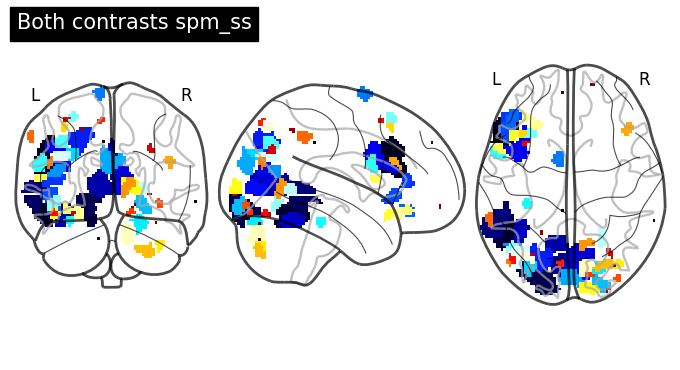

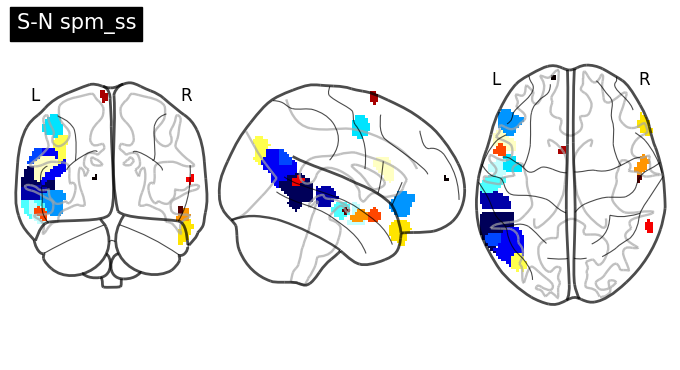

In [8]:
# Load spm_ss results
from pathlib import Path
from nilearn.image import load_img, new_img_like

spm_ss_folder = Path.cwd().parent / "data" / "spm_ss_results"
sent_localized_parcels = load_img(
    spm_ss_folder / "parcels_Sem_sentminusPerc_sent_2024-10-16" / "fROIs.nii"
)
plot_glass_brain(
    sent_localized_parcels,
    plot_abs=False,
    title="Sem_sentminusPerc_sent spm_ss",
)
photo_localized_parcels = load_img(
    spm_ss_folder / "parcels_Sem_photominusPerc_photo_2024-10-16" / "fROIs.nii"
)
plot_glass_brain(
    photo_localized_parcels,
    plot_abs=False,
    title="Sem_photominusPerc_photo spm_ss",
)
both_localized_parcels = load_img(
    (
        spm_ss_folder
        / "parcels_Sem_sentminusSem_photo_and_Sem_sentminusPerc_sent_2024-10-16"
        / "fROIs.nii"
    )
)
plot_glass_brain(
    both_localized_parcels, plot_abs=False, title="Both contrasts spm_ss"
)
SminuN_localized_parcels = load_img(
    spm_ss_folder / "parcels_S-N_2024-10-23" / "fROIs.nii"
)
plot_glass_brain(SminuN_localized_parcels, plot_abs=False, title="S-N spm_ss")

In [9]:
from funROI.utils import get_parcels

languageSminusN = get_parcels("languageSminusN")
eventsPhoto = get_parcels("eventsPhoto")
eventsSent = get_parcels("eventsSent")
eventsBoth = get_parcels("eventsBoth")

In [10]:
from matplotlib import pyplot as plt


def plot_diff(spm_ss_parcels, funroi_parcels, title):
    plot_glass_brain(spm_ss_parcels, plot_abs=False, title=title + " spm_ss")
    plot_glass_brain(funroi_parcels, plot_abs=False, title=title + " funROI")
    spm_ss_parcels_binary = spm_ss_parcels.get_fdata() != 0
    funroi_parcels_binary = funroi_parcels.get_fdata() != 0
    diff = spm_ss_parcels_binary.astype(int) - funroi_parcels_binary.astype(
        int
    )
    plot_glass_brain(
        new_img_like(spm_ss_parcels, diff),
        plot_abs=False,
        title=title + " spm_ss - funROI",
        colorbar=True,
        cmap="coolwarm",
        vmax=1,
        vmin=-1,
        threshold=0,
    )
    print(f"spm_ss voxels n: {spm_ss_parcels_binary.sum()}")
    print(f"funroi voxels n: {funroi_parcels_binary.sum()}")
    print(
        f"intersection: {(spm_ss_parcels_binary & funroi_parcels_binary).sum()} ({(spm_ss_parcels_binary & funroi_parcels_binary).sum() / spm_ss_parcels_binary.sum() * 100:.2f}%)"
    )

spm_ss voxels n: 4375
funroi voxels n: 4375
intersection: 4375 (100.00%)
spm_ss voxels n: 31429
funroi voxels n: 31429
intersection: 31429 (100.00%)
spm_ss voxels n: 32122
funroi voxels n: 32120
intersection: 32120 (99.99%)
spm_ss voxels n: 7271
funroi voxels n: 7271
intersection: 7271 (100.00%)


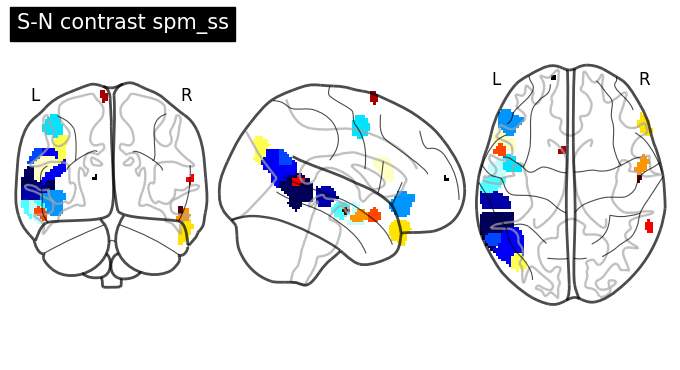

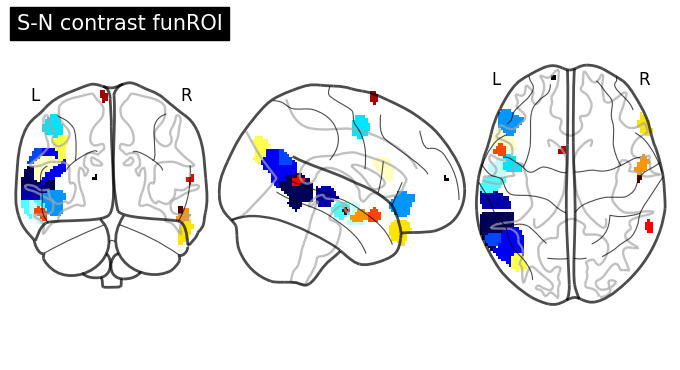

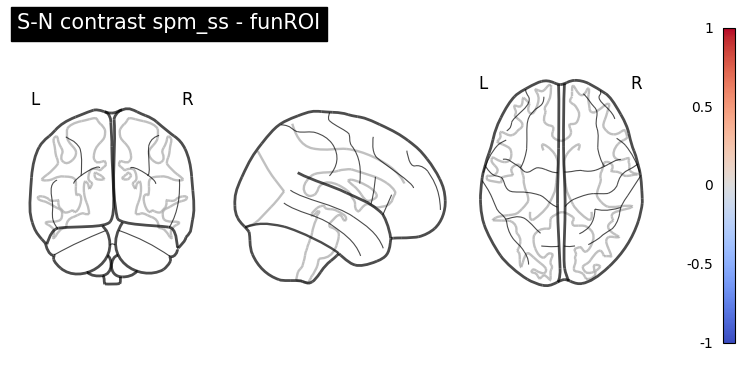

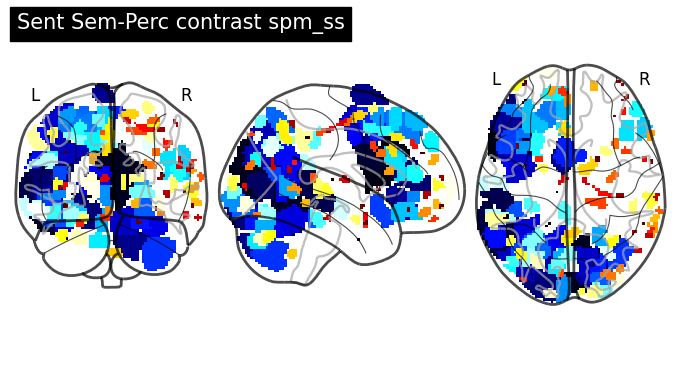

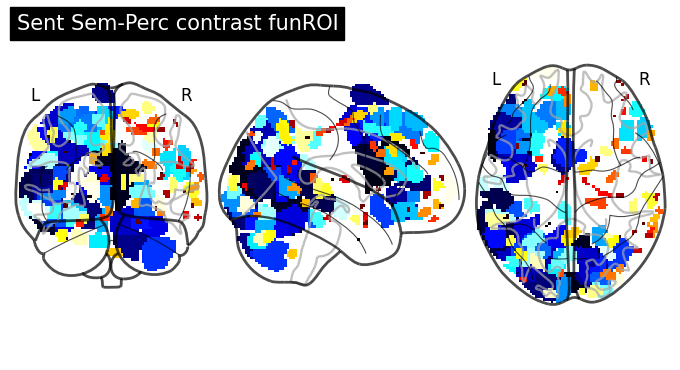

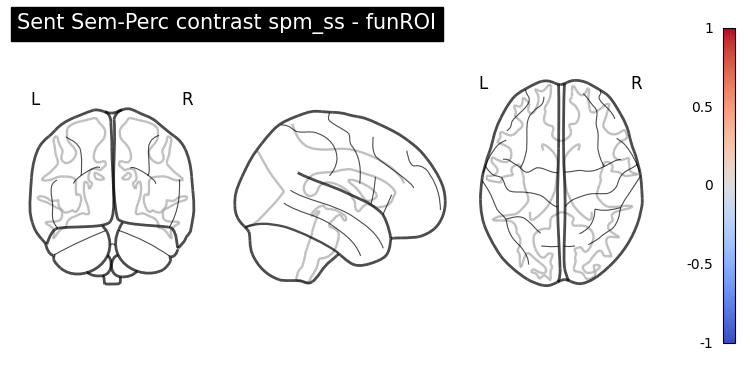

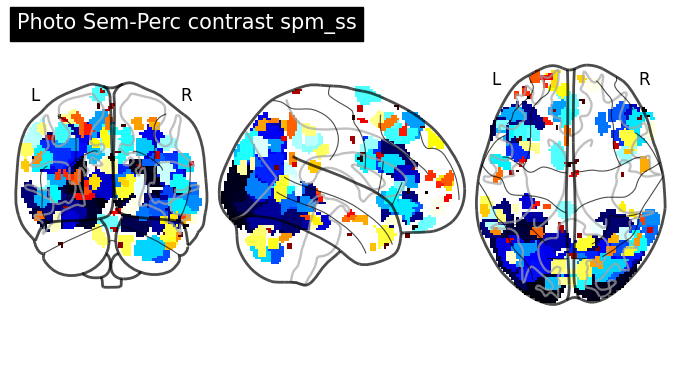

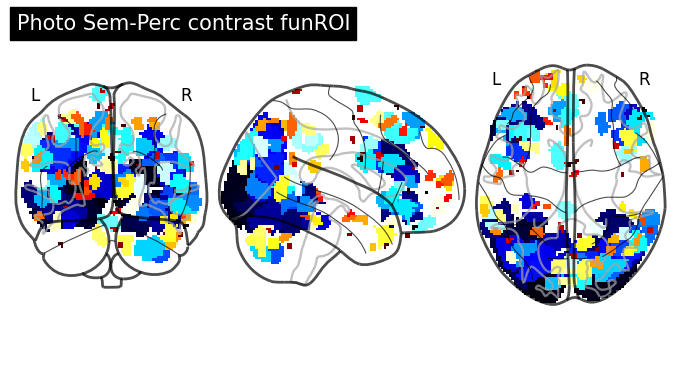

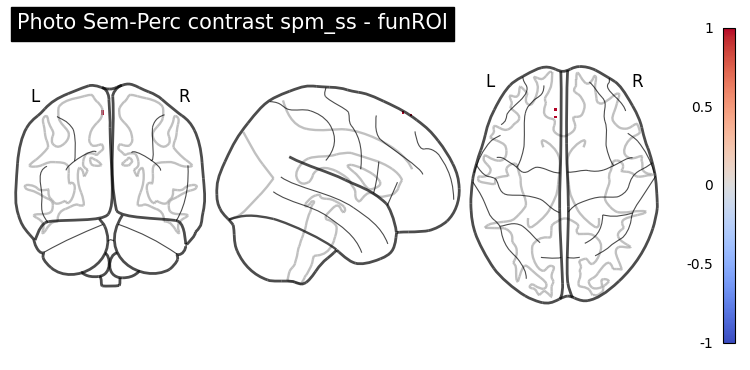

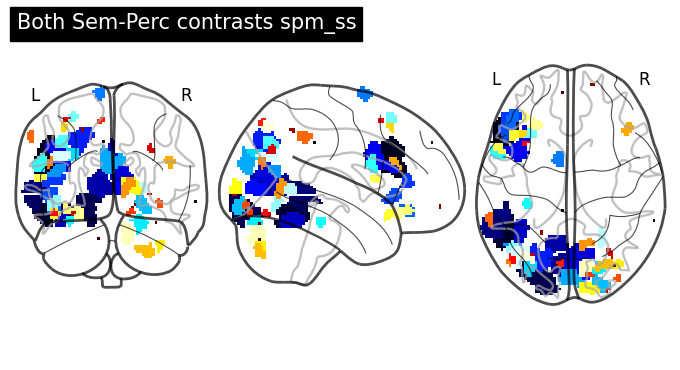

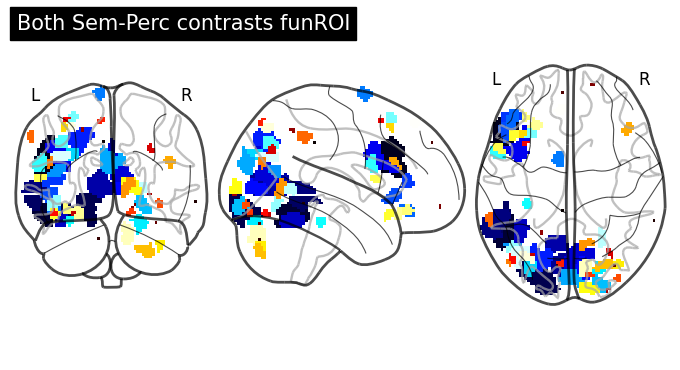

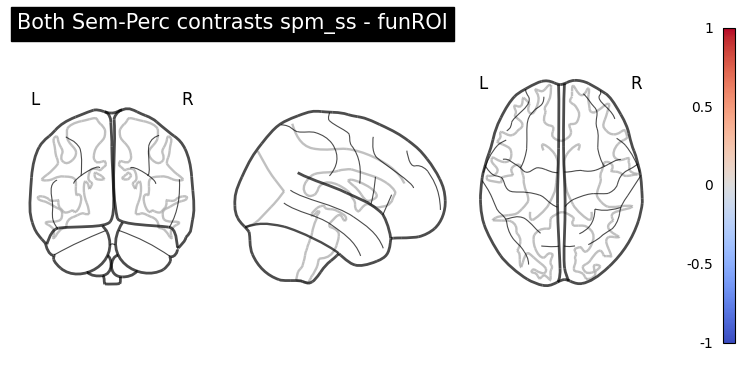

In [11]:
plot_diff(SminuN_localized_parcels, languageSminusN, "S-N contrast")
plot_diff(sent_localized_parcels, eventsSent, "Sent Sem-Perc contrast")
plot_diff(photo_localized_parcels, eventsPhoto, "Photo Sem-Perc contrast")
plot_diff(both_localized_parcels, eventsBoth, "Both Sem-Perc contrasts")